In [227]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt

In [228]:
insta_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataSets/Instagram data.csv", encoding='cp1252')
print(insta_df.shape)
insta_df.head()

(119, 13)


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


Printing the column names of insta_df

In [229]:
insta_columns = insta_df.columns
insta_columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

Describing The insta_df DataFrame

In [230]:
insta_df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


Checking For NaN values

In [231]:
nan_check = pd.isna(insta_df)
for column in insta_columns:
  if True in nan_check:
    print(f"Missing Values in {column}")
  else:
    print(f"No Missing Values in {column}")

No Missing Values in Impressions
No Missing Values in From Home
No Missing Values in From Hashtags
No Missing Values in From Explore
No Missing Values in From Other
No Missing Values in Saves
No Missing Values in Comments
No Missing Values in Shares
No Missing Values in Likes
No Missing Values in Profile Visits
No Missing Values in Follows
No Missing Values in Caption
No Missing Values in Hashtags


Plotting Impression Distribution

In [232]:
fig = px.bar(insta_df, x=insta_df.index,  y='Impressions')
fig.update_layout(xaxis_title="Count")
fig.show()

Impressions Over time

In [233]:
fig = px.line(insta_df, x=insta_df.index, y='Impressions', title='Impressions Over time')
fig.update_layout(xaxis_title="Count")
fig.show()

Plotting Likes, Saves and Follows

In [234]:
cols = ['Likes', 'Saves', 'Follows']

fig = go.Figure()
for column in cols:
  fig.add_trace( go.Scatter(
        x=insta_df.index,
        y=insta_df[column],
        mode='lines',
        name=column
))

fig.show()

A Function for Calculating and Plotting Pie Charts

In [235]:
def pie_plotter(cols):
  dict_pie_plot_data = dict() # empty dict
  impression_mean = insta_df['Impressions'].mean()

  for column in cols: # foreach column
    current_col_mean = insta_df[column].mean()
    dict_pie_plot_data[column] = (current_col_mean / impression_mean ) * 100 # calculating percentage

  fig = px.pie( values=dict_pie_plot_data.values(), names=dict_pie_plot_data.keys())
  fig.show()

Plotting Pie Chart of: [ 'From Home', 'From Hashtags', 'From Explore', 'From Other']

In [236]:
cols = [ 'From Home', 'From Hashtags', 'From Explore', 'From Other']
pie_plotter(cols)

Plotting Pie Chart of: ['Likes', 'Saves', 'Shares', 'Comments']

In [237]:
cols = ['Likes', 'Saves', 'Shares', 'Comments']
pie_plotter(cols)

Relation Between Profile Visits and Follows

In [238]:
fig = px.scatter(x=insta_df['Profile Visits'], y=insta_df['Follows'], trendline="ols")
fig.update_layout(xaxis_title="Profile Visits", yaxis_title="Follows")
fig.show()

Making a Wordcloud For displaying the buzz words in Hashtags

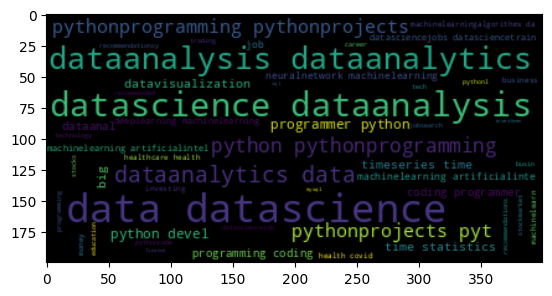

In [239]:
words = insta_df['Hashtags'].to_string(index=False)

wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("on")
plt.show()

Checking for Correlations and Making a Heatmap

In [240]:
import plotly.express as px
cor = insta_df.corr()

fig = px.imshow(cor, text_auto=True)
fig.show()

<ipython-input-240-61246b016cde>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



This Block of Code Will extract Unique Hashtags in the DataSet and Make a numpy List of those Hashtags

In [241]:
hashtags_series = insta_df["Hashtags"] # Separating the hashtag column
listed_hashtags_series = hashtags_series.str.split() # making a list of hashtag in each row
exploded_hashtags = listed_hashtags_series.explode() # exploding the hashtag to make list rows to column
unique_hashtags = exploded_hashtags.unique() # unique will fetch the unique hashtags and store them in a np list
unique_hashtags

array(['#finance', '#money', '#business', '#investing', '#investment',
       '#trading', '#stockmarket', '#data', '#datascience',
       '#dataanalysis', '#dataanalytics', '#datascientist',
       '#machinelearning', '#python', '#pythonprogramming',
       '#pythonprojects', '#pythoncode', '#artificialintelligence', '#ai',
       '#dataanalyst', '#amankharwal', '#thecleverprogrammer',
       '#healthcare', '#health', '#covid', '#deeplearning',
       '#machinelearningprojects', '#datascienceprojects',
       '#machinelearningmodels', '#pythonlearning', '#pythondeveloper',
       '#pythoncoding', '#pythonprogrammer', '#datavisualization',
       '#bigdata', '#dataviz', '#analytics', '#technology',
       '#programming', '#statistics', '#coding', '#businessintelligence',
       '#datamining', '#tech', '#computerscience', '#tableau',
       '#database', '#algorithm', '#algorithms',
       '#machinelearningalgorithms', '#ml', '#softskills', '#stocks',
       '#forex', '#candlestick', '#ca

Cleaning The Data: Its possible for non '#' word to make it to the list so making sure that the list only contains Hashtags

In [242]:
# removing anything that is not a hashtag
index_to_drop = list()
for i, h in enumerate(unique_hashtags):
    if "#" not in h:
        index_to_drop.append(i)
        print("Not a Hashtag: ", h)

Not a Hashtag:  @codergallery


In [243]:
result_counts = {} # making an empty dict
for hashtag in hashtags_list: # foreach unique hashtag in hashtags
    for i, row in insta_df.iterrows(): # foreach row in the insta dataframe
        if hashtag in row["Hashtags"]: # if the hashtag is in the dataframe row
            result_counts[hashtag] = result_counts.get(hashtag, 0) + 1 # increase the count of this particular hashtag key

result_counts

{'#finance': 4,
 '#money': 4,
 '#business': 16,
 '#investing': 4,
 '#investment': 3,
 '#trading': 3,
 '#stockmarket': 3,
 '#data': 94,
 '#datascience': 94,
 '#dataanalysis': 77,
 '#dataanalytics': 87,
 '#datascientist': 83,
 '#machinelearning': 97,
 '#python': 109,
 '#pythonprogramming': 95,
 '#pythonprojects': 78,
 '#pythoncode': 78,
 '#artificialintelligence': 89,
 '#ai': 91,
 '#dataanalyst': 12,
 '#amankharwal': 117,
 '#thecleverprogrammer': 117,
 '#healthcare': 3,
 '#health': 3,
 '#covid': 3,
 '#deeplearning': 75,
 '#machinelearningprojects': 43,
 '#datascienceprojects': 43,
 '#machinelearningmodels': 7,
 '#pythonlearning': 19,
 '#pythondeveloper': 19,
 '#pythoncoding': 19,
 '#pythonprogrammer': 19,
 '#datavisualization': 19,
 '#bigdata': 20,
 '#dataviz': 5,
 '#analytics': 16,
 '#technology': 25,
 '#programming': 26,
 '#statistics': 14,
 '#coding': 24,
 '#businessintelligence': 6,
 '#datamining': 6,
 '#tech': 25,
 '#computerscience': 21,
 '#tableau': 2,
 '#database': 7,
 '#algorith

In [244]:
# making a hashtag dataframe in desecding order
hashtag_dist = pd.DataFrame(
    data=result_counts.values(),
    index=result_counts.keys(),
    columns=['Score']).sort_values("Score", ascending=False)
hashtag_dist

,Score
#thecleverprogrammer,117
#amankharwal,117
#python,109
#machinelearning,97
#pythonprogram,95
...,...
#alexnet,1
#bigdataanalytics,1
#qrcodes,1
#datascienceinterview,1


Plotting the Hashtag Distribution

In [245]:
fig = px.bar(hashtag_dist, x=hashtag_dist.index, y="Score")
fig.update_layout(xaxis_title="Hashtags")
fig.show()

This is Same as before With a Minor Change

In [246]:
result_likes = {}
for hashtag in hashtags_list:
    for i, row in insta_df.iterrows():
      if hashtag in row["Hashtags"]:
        result_likes[hashtag] = result_likes.get(hashtag, 0) + row["Likes"] # this time we are adding the values of Likes instead of a increment of 1

result_likes

{'#finance': 529,
 '#money': 529,
 '#business': 2012,
 '#investing': 529,
 '#investment': 380,
 '#trading': 380,
 '#stockmarket': 380,
 '#data': 16311,
 '#datascience': 16311,
 '#dataanalysis': 13801,
 '#dataanalytics': 15283,
 '#datascientist': 14703,
 '#machinelearning': 16509,
 '#python': 18238,
 '#pythonprogramming': 16251,
 '#pythonprojects': 14239,
 '#pythoncode': 14239,
 '#artificialintelligence': 15515,
 '#ai': 15733,
 '#dataanalyst': 1845,
 '#amankharwal': 20462,
 '#thecleverprogrammer': 20462,
 '#healthcare': 729,
 '#health': 729,
 '#covid': 729,
 '#deeplearning': 13204,
 '#machinelearningprojects': 8458,
 '#datascienceprojects': 8458,
 '#machinelearningmodels': 761,
 '#pythonlearning': 3659,
 '#pythondeveloper': 3659,
 '#pythoncoding': 3659,
 '#pythonprogrammer': 3659,
 '#datavisualization': 2382,
 '#bigdata': 2671,
 '#dataviz': 567,
 '#analytics': 2001,
 '#technology': 3187,
 '#programming': 3355,
 '#statistics': 1766,
 '#coding': 3129,
 '#businessintelligence': 728,
 '#dat

In [247]:
hashtag_dist_likes = pd.DataFrame(
    data=result_likes.values(),
    index=result_likes.keys(),
    columns=['Score']
)
hashtag_dist_likes

,Score
#finance,529
#money,529
#business,2012
#investing,529
#investment,380
...,...
#sql,308
#mysql,308
#python3,296
#pythonprogramminglanguage,296


Like Distribution w.r.t hashtags

In [248]:
fig = px.bar(hashtag_dist_likes, x=hashtag_dist_likes.index, y="Score")
fig.update_layout(xaxis_title="Hashtags", yaxis_title="Likes")
fig.show()

Again the same thing with a minor change

In [249]:
result_impressions = {}
for hashtag in hashtags_list:
    for i, row in insta_df.iterrows():
      if hashtag in row["Hashtags"]:
        result_impressions[hashtag] = result_impressions.get(hashtag, 0) + row["Impressions"] # this time its impression instead of Likes

result_impressions

{'#finance': 14224,
 '#money': 14224,
 '#business': 51387,
 '#investing': 14224,
 '#investment': 9757,
 '#trading': 9757,
 '#stockmarket': 9757,
 '#data': 524640,
 '#datascience': 524640,
 '#dataanalysis': 457923,
 '#dataanalytics': 497787,
 '#datascientist': 483746,
 '#machinelearning': 532627,
 '#python': 578243,
 '#pythonprogramming': 525346,
 '#pythonprojects': 470276,
 '#pythoncode': 470276,
 '#artificialintelligence': 506190,
 '#ai': 512027,
 '#dataanalyst': 47051,
 '#amankharwal': 672166,
 '#thecleverprogrammer': 672166,
 '#healthcare': 18292,
 '#health': 18292,
 '#covid': 18292,
 '#deeplearning': 445317,
 '#machinelearningprojects': 297427,
 '#datascienceprojects': 297427,
 '#machinelearningmodels': 27201,
 '#pythonlearning': 135901,
 '#pythondeveloper': 135901,
 '#pythoncoding': 135901,
 '#pythonprogrammer': 135901,
 '#datavisualization': 64864,
 '#bigdata': 70884,
 '#dataviz': 15438,
 '#analytics': 53464,
 '#technology': 85523,
 '#programming': 90132,
 '#statistics': 47283,
 

In [250]:
hashtag_dist_impressions = pd.DataFrame(
    data=result_impressions.values(),
    index=result_impressions.keys(),
    columns=['Score']
)
hashtag_dist_impressions

,Score
#finance,14224
#money,14224
#business,51387
#investing,14224
#investment,9757
...,...
#sql,17713
#mysql,17713
#python3,15991
#pythonprogramminglanguage,15991


Distribution of Impression w.r.t Hashtags

In [251]:
fig = px.bar(hashtag_dist_impressions, x=hashtag_dist_impressions.index, y="Score")
fig.update_layout(xaxis_title="Hashtags", yaxis_title="Impressions")
fig.show()

**Summary:**


1.   From impression distribution its clear that most impressions lie in the region of 5k to 10k and in edge cases we do get more than 15k Impression.
2.   Likes and Saves are in Somewhat relation with each other but the number of Follows doesn't seem to be much infulenced by Likes and Saves.
3.   Most of the Impression Seem to be coming from Home, Hashtags and Explore.
4.   Same goes for Likes and Saves.
5.   Having More Follows doesn't mean More profile Visits.
6.   buzz words in Hashtags are DataAnalysis, DataScience, PythonProgramming etc.
7.   From the Correlation matrix we see a strong correlation between 'Impressions' and ['From Home','From Explore','Likes','Follows']
8.   Distribution of Hashtags seem to be revolving around Python, Machine Learning, Data and AI.
9.   Posts Containing Hashtags Such as Python, Machine Learning, Data and AI. Seem to get more likes.
10.  Same is True of relation between Impressions and Hashtags